In [1]:
import pandas as pd 


df_Yzj = pd.read_csv('BS6.SI.CSV')
df_Yzj.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3174,12/16/2019,1.13,1.13,1.09,1.10,1.10,27908700
3175,12/17/2019,1.10,1.11,1.07,1.07,1.07,32804600
3176,12/18/2019,1.08,1.11,1.08,1.09,1.09,38128700
3177,12/19/2019,1.09,1.09,1.07,1.08,1.08,20343100
3178,12/20/2019,1.08,1.09,1.07,1.07,1.07,33596100


In [2]:
df_Yzj

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/18/2007,1.35,1.39,1.33,1.34,0.842029,413736000
1,4/19/2007,1.35,1.35,1.26,1.27,0.798042,95804
2,4/20/2007,1.28,1.31,1.28,1.30,0.816894,70064
3,4/23/2007,1.31,1.31,1.26,1.27,0.798042,36099
4,4/24/2007,1.26,1.27,1.26,1.27,0.798042,14422
...,...,...,...,...,...,...,...
3174,12/16/2019,1.13,1.13,1.09,1.10,1.100000,27908700
3175,12/17/2019,1.10,1.11,1.07,1.07,1.070000,32804600
3176,12/18/2019,1.08,1.11,1.08,1.09,1.090000,38128700
3177,12/19/2019,1.09,1.09,1.07,1.08,1.080000,20343100


In [3]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df_Yzj["Open"])
plt.plot(df_Yzj["High"])
plt.plot(df_Yzj["Low"])
plt.plot(df_Yzj["Close"])
plt.title('Yangzijiang Stock price history')
plt.ylabel('Price (SGD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

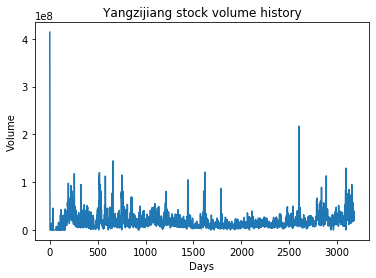

In [4]:
plt.figure()
plt.plot(df_Yzj["Volume"])
plt.title('Yangzijiang stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [5]:
print("checking if any null values are present\n", df_Yzj.isna().sum())

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
df_Yzj = df_Yzj.dropna() 

In [7]:
print("checking if any null values are present\n", df_Yzj.isna().sum())

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
df_Yzj

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/18/2007,1.35,1.39,1.33,1.34,0.842029,413736000
1,4/19/2007,1.35,1.35,1.26,1.27,0.798042,95804
2,4/20/2007,1.28,1.31,1.28,1.30,0.816894,70064
3,4/23/2007,1.31,1.31,1.26,1.27,0.798042,36099
4,4/24/2007,1.26,1.27,1.26,1.27,0.798042,14422
...,...,...,...,...,...,...,...
3174,12/16/2019,1.13,1.13,1.09,1.10,1.100000,27908700
3175,12/17/2019,1.10,1.11,1.07,1.07,1.070000,32804600
3176,12/18/2019,1.08,1.11,1.08,1.09,1.090000,38128700
3177,12/19/2019,1.09,1.09,1.07,1.08,1.080000,20343100


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["Open","High","Low","Close","Volume"]
df_train, df_test = train_test_split(df_Yzj, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))
# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

Train and Test size 2543 636


In [10]:
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [11]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [12]:
import time
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook
params = {
    "batch_size": 20,  # 20<16<10, 25 was a bust
    ##"epochs": 300,
    "epochs":100,
    "lr": 0.00010000,
    "time_steps": 60
}

TIME_STEPS = params["time_steps"]
BATCH_SIZE = params["batch_size"]
stime = time.time()


In [14]:
x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test, 3)
x_test_t = trim_dataset(x_temp, BATCH_SIZE)
y_test_t = trim_dataset(y_temp, BATCH_SIZE)


length of time-series i/o (2483, 60, 5) (2483,)



length of time-series i/o (576, 60, 5) (576,)


### Create Model

In [15]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers


def create_model():
    gru_model = Sequential()
    gru_model.add(GRU(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True, kernel_initializer='random_uniform'))
    gru_model.add(Dropout(0.5))
    gru_model.add(Dense(20,activation='relu'))
    gru_model.add(Dense(1,activation='sigmoid'))
    optimizer = optimizers.RMSprop(lr=params["lr"])
    gru_model.compile(loss='mean_squared_error', optimizer=optimizer)
    gru_model.summary()
    return gru_model

Using TensorFlow backend.


In [17]:
import os
#OUTPUT_PATH ='/home/victor/Stock-Price-Prediction/outputs/'
OUTPUT_PATH ='C:\\Users\\Victor\\Desktop\\project5\\Stock-Price-Prediction\\outputyzjGRU1'
OUTPUT_PATH

'C:\\Users\\Victor\\Desktop\\project5\\Stock-Price-Prediction\\outputyzjGRU1'

In [18]:
pwd

'C:\\Users\\Victor\\Desktop\\project5\\Stock-Price-Prediction'

In [19]:
import pickle

In [22]:
model = None
try:
    model = pickle.load(open("GRU_model1", 'rb'))
    print("Loaded saved model...")
except FileNotFoundError:
    print("Model not found")


x_temp, y_temp = build_timeseries(x_test, 3)
x_test_t = trim_dataset(x_temp, BATCH_SIZE)
y_test_t = trim_dataset(y_temp, BATCH_SIZE)

print("Test size", x_test_t.shape, y_test_t.shape)
    
is_update_model = True
if model is None or is_update_model:
    from keras import backend as K
    print("Building model...")
    print("checking if GPU available", K.tensorflow_backend._get_available_gpus())
    model = create_model()
    
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                       patience=40, min_delta=0.0001)
    
    mcp = ModelCheckpoint(os.path.join(OUTPUT_PATH,
                          "best_model.h5"), monitor='val_loss', verbose=1,
                          save_best_only=True, save_weights_only=False, mode='min', period=1)

    # Not used here. But leaving it here as a reminder for future
    r_lr_plat = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, 
                                  verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
    
   ## csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'training_log_' + time.ctime().replace(" ","_") + '.log'), append=True)
    csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'training_log_' + time.strftime("%a %b %d %H %M %S %Y", time.localtime()) + '.log'), append=True)
    
  #  csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'training_log_'  + '.log'), append=True)
    
    history = model.fit(x_t, y_t, epochs=params["epochs"], verbose=2, batch_size=BATCH_SIZE,
                        shuffle=False, validation_data=(trim_dataset(x_test_t, BATCH_SIZE),
                        trim_dataset(y_test_t, BATCH_SIZE)), callbacks=[es, mcp, csv_logger])
    
    print("saving model...")
    pickle.dump(model, open("GRU_model1", "wb"))

Model not found



length of time-series i/o (576, 60, 5) (576,)
Test size (560, 60, 5) (560,)
Building model...
checking if GPU available []
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (20, 100)                 31800     
_________________________________________________________________
dropout_1 (Dropout)          (20, 100)                 0         
_________________________________________________________________
dense_1 (Dense)              (20, 20)                  2020      
_________________________________________________________________
dense_2 (Dense)              (20, 1)                   21        
Total params: 33,841
Trainable params: 33,841
Non-trainable params: 0
_________________________________________________________________
Train on 2480 samples, validate on 560 samples
Epoch 1/100
 - 7s - loss: 0.0453 - val_loss: 0.0111

Epoch 00001: val_loss im


Epoch 00090: val_loss did not improve from 0.00026
Epoch 91/100
 - 6s - loss: 6.9731e-04 - val_loss: 2.9539e-04

Epoch 00091: val_loss did not improve from 0.00026
Epoch 92/100
 - 6s - loss: 7.0681e-04 - val_loss: 2.8668e-04

Epoch 00092: val_loss did not improve from 0.00026
Epoch 93/100
 - 6s - loss: 6.6032e-04 - val_loss: 2.8118e-04

Epoch 00093: val_loss did not improve from 0.00026
Epoch 94/100
 - 7s - loss: 6.9801e-04 - val_loss: 2.6659e-04

Epoch 00094: val_loss did not improve from 0.00026
Epoch 95/100
 - 6s - loss: 6.8568e-04 - val_loss: 2.9172e-04

Epoch 00095: val_loss did not improve from 0.00026
Epoch 96/100
 - 6s - loss: 6.9091e-04 - val_loss: 2.6804e-04

Epoch 00096: val_loss did not improve from 0.00026
Epoch 97/100
 - 6s - loss: 7.4795e-04 - val_loss: 2.8111e-04

Epoch 00097: val_loss did not improve from 0.00026
Epoch 98/100
 - 6s - loss: 6.5695e-04 - val_loss: 3.2033e-04

Epoch 00098: val_loss did not improve from 0.00026
Epoch 99/100
 - 6s - loss: 6.8407e-04 - val_

In [24]:
from sklearn.metrics import mean_squared_error
# model.evaluate(x_test_t, y_test_t, batch_size=BATCH_SIZE
y_pred = model.predict(trim_dataset(x_test_t, BATCH_SIZE), batch_size=BATCH_SIZE)
y_pred = y_pred.flatten()
y_test_t = trim_dataset(y_test_t, BATCH_SIZE)
error = mean_squared_error(y_test_t, y_pred)
print("Mean Square Error is", error, y_pred.shape, y_test_t.shape)
print(y_pred[0:15])
print(y_test_t[0:15])

Mean Square Error is 0.00026918179284912084 (560,) (560,)
[0.5227742  0.46816742 0.43608707 0.42692447 0.4248958  0.42768398
 0.43320084 0.44170624 0.45363107 0.45923474 0.45994833 0.45681363
 0.45384917 0.45140067 0.4486427 ]
[0.45102041 0.45918367 0.46734694 0.45510204 0.45714286 0.45714286
 0.46530612 0.48163265 0.47142857 0.46122449 0.46734694 0.46326531
 0.46122449 0.45102041 0.45714286]


In [25]:
# convert the predicted value to range of real data
y_pred_org = (y_pred * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]
# min_max_scaler.inverse_transform(y_pred)
y_test_t_org = (y_test_t * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]
# min_max_scaler.inverse_transform(y_test_t)
print(y_pred_org[0:15])
print(y_test_t_org[0:15])

[1.5707968 1.4370102 1.3584133 1.3359649 1.3309947 1.3378258 1.3513421
 1.3721802 1.4013962 1.4151251 1.4168733 1.4091934 1.4019305 1.3959316
 1.3891746]
[1.395 1.415 1.435 1.405 1.41  1.41  1.43  1.47  1.445 1.42  1.435 1.425
 1.42  1.395 1.41 ]


In [26]:
import numpy as np

def mean_absolute_percentage_error(y_test_t, y_pred): 
    y_test_t, y_pred = np.array(y_test_t), np.array(y_pred)
    return np.mean(np.abs((y_test_t - y_pred) / y_test_t)) * 100

In [27]:
mean_absolute_percentage_error(y_test_t, y_pred)

3.3504121102776514

In [ ]:
#score, acc = model.evaluate(trim_dataset(x_test_t,BATCH_SIZE),trim_dataset(y_test_t,BATCH_SIZE),batch_size=BATCH_SIZE)
#print('Test score:', score)
#print('Test accuracy:', acc)

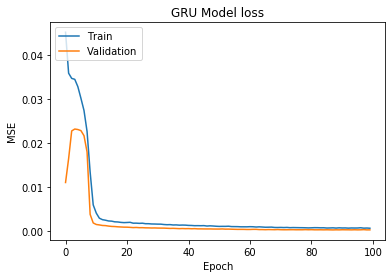

In [28]:
# Visualize the training data
from matplotlib import pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Model loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()
#plt.savefig(os.path.join(OUTPUT_PATH, 'train_vis_BS_'+str(BATCH_SIZE)+"_"+time.ctime()+'.png'))
plt.savefig(os.path.join(OUTPUT_PATH, 'train_vis_BS_'+str(BATCH_SIZE)+"_"+time.strftime("%a %b %d %H %M %S %Y", time.localtime())+'.png'))

In [29]:
# load the saved best model from above
saved_model = load_model(os.path.join(OUTPUT_PATH, 'best_model.h5')) # , "lstm_best_7-3-19_12AM",
print(saved_model)

y_pred = saved_model.predict(trim_dataset(x_test_t, BATCH_SIZE), batch_size=BATCH_SIZE)
y_pred = y_pred.flatten()
y_test_t = trim_dataset(y_test_t, BATCH_SIZE)
error = mean_squared_error(y_test_t, y_pred)
print("Mean Square Error is", error, y_pred.shape, y_test_t.shape)
print(y_pred[0:15])
print(y_test_t[0:15])
y_pred_org = (y_pred * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3] # min_max_scaler.inverse_transform(y_pred)
y_test_t_org = (y_test_t * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3] # min_max_scaler.inverse_transform(y_test_t)
print(y_pred_org[0:15])
print(y_test_t_org[0:15])


Mean Square Error is 0.00025562548831117464 (560,) (560,)
[0.52169365 0.4713703  0.44283983 0.4336339  0.4302323  0.43119523
 0.43512917 0.44223255 0.45273426 0.45803994 0.45898908 0.45684522
 0.4549929  0.45337653 0.4508955 ]
[0.45102041 0.45918367 0.46734694 0.45510204 0.45714286 0.45714286
 0.46530612 0.48163265 0.47142857 0.46122449 0.46734694 0.46326531
 0.46122449 0.45102041 0.45714286]
[1.5681494 1.4448572 1.3749576 1.352403  1.3440691 1.3464283 1.3560665
 1.3734697 1.3991989 1.4121978 1.4145232 1.4092708 1.4047326 1.4007725
 1.394694 ]
[1.395 1.415 1.435 1.405 1.41  1.41  1.43  1.47  1.445 1.42  1.435 1.425
 1.42  1.395 1.41 ]


In [30]:
import numpy as np

def mean_absolute_percentage_error(y_test_t, y_pred): 
    y_test_t, y_pred = np.array(y_test_t), np.array(y_pred)
    return np.mean(np.abs((y_test_t - y_pred) / y_test_t)) * 100

In [31]:
mean_absolute_percentage_error(y_test_t, y_pred)

3.1752360046911297

In [32]:
def print_time(text, stime):
    seconds = (time.time()-stime)
    print(text, seconds//60,"minutes : ",np.round(seconds%60),"seconds")


program completed  13.0 minutes :  58.0 seconds


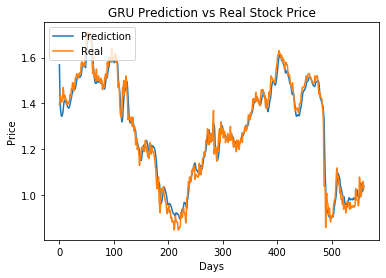

In [33]:
# Visualize the prediction
from matplotlib import pyplot as plt
plt.figure()
plt.plot(y_pred_org)
plt.plot(y_test_t_org)
plt.title('GRU Prediction vs Real Stock Price')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
#plt.show()
##plt.savefig(os.path.join(OUTPUT_PATH, 'pred_vs_real_BS'+str(BATCH_SIZE)+"_"+time.ctime()+'.png'))
plt.savefig(os.path.join(OUTPUT_PATH, 'pred_vs_real_BS'+str(BATCH_SIZE)+"_"+time.strftime("%a %b %d %H %M %S %Y", time.localtime())+'.png'))
print_time("program completed ", stime)